In [1]:
# !pip install pandas
# !pip install scikit-learn

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# dataset

In [3]:
# Mengatur seed untuk reproduksibilitas
seed = 42

# Load dataset iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Mengacak dataset
iris_df = iris_df.sample(frac=1, random_state=seed)

# explorasi

In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 73 to 102
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [5]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# spliter

In [6]:
# Memilih fitur dan target
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed, stratify=y
)

# model 1 DecisionTreeClassifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Membuat dan melatih model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = model_dt.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Melihat laporan klasifikasi
report = classification_report(y_test, y_pred, target_names=iris.target_names, output_dict=True)
print("\nLaporan Klasifikasi:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

import joblib

# save the model to disk
joblib.dump(model_dt, "dt_model.sav")

Akurasi: 0.9555555555555556

Laporan Klasifikasi:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



['dt_model.sav']

# model 2 RandomForestClassifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Membuat instance dari RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=seed)

# Melatih classifier pada data pelatihan
model_rf.fit(X_train, y_train)

# Memprediksi pada set pengujian
y_pred = model_rf.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

# Melihat laporan klasifikasi
print(classification_report(y_test, y_pred, target_names=iris.target_names))

import joblib

# save the model to disk
joblib.dump(model_rf, "rf_model.sav")

Akurasi: 0.9555555555555556
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



['rf_model.sav']

# plot tree

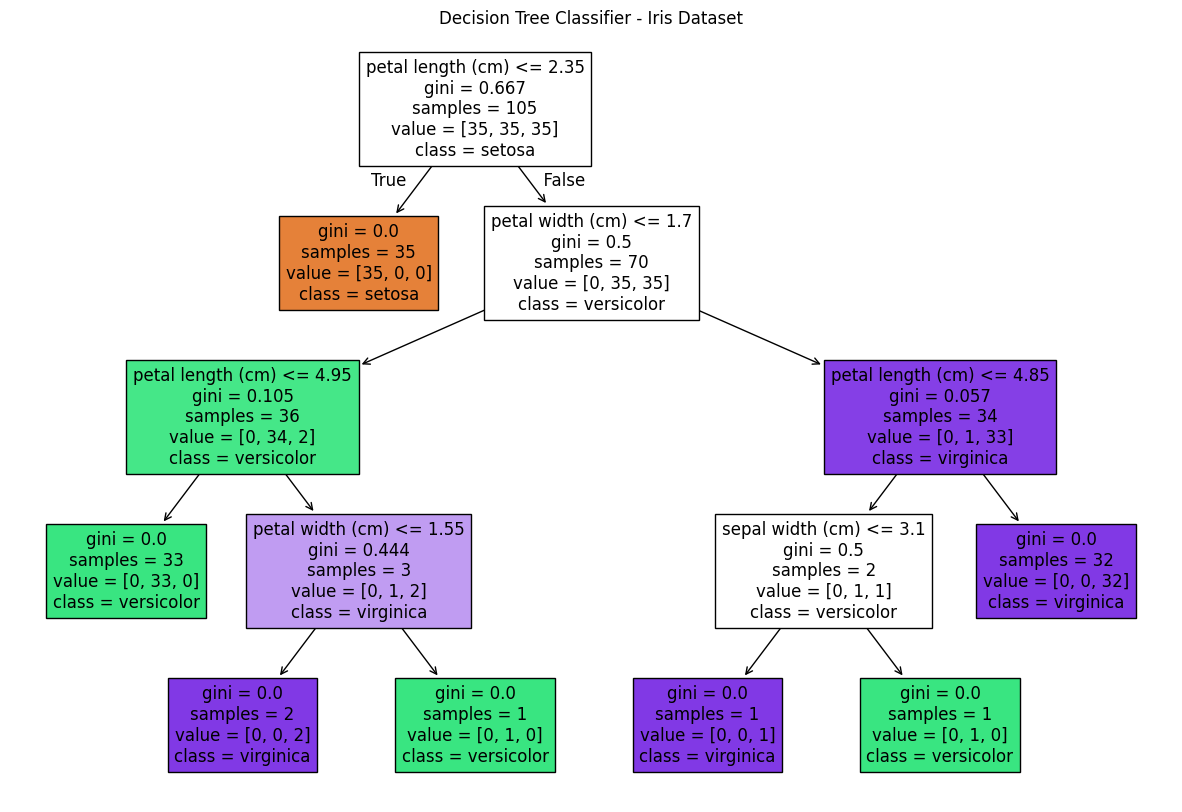

<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
feature_names = iris.feature_names
target_names = iris.target_names

# Plot decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_dt, filled=True, feature_names=feature_names, class_names=target_names)
plt.title("Decision Tree Classifier - Iris Dataset")

# Menampilkan plot ke layar
plt.show()

# Simpan ke JPG
plt.savefig('decision_tree2.jpg')